In [1]:
from pathlib import Path
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

Path('database.db').touch()
conn = sqlite3.connect('database.db')
c = conn.cursor()
c.execute('''CREATE TABLE shipments (MixId INTEGER,
                                     MixDesc TEXT,
                                     plant INTEGER,
                                     ShipDate TEXT,
                                     DeliveryWeight REAL,
                                     Cost REAL,
                                     Quantity REAL,
                                     OrderDate TEXT,
                                     WeightValue REAL);''')
c.execute('''CREATE TABLE kidney (Age INTEGER,
                                  	 BloodPressure INTEGER,	
                                     SpecificGravity REAL,	
                                     Albumin INTEGER,	
                                     Sugar INTEGER,	
                                     RedbloodCells TEXT,	
                                     PusCell TEXT,	
                                     PuscellClumps TEXT,	
                                     bacteria TEXT,
                                     BloodGlucoseRandom INTEGER,
                                     BloodUrea	REAL,
                                     SerumCreatinine REAL,	
                                     Sodium	REAL,
                                     Potassium	REAL,
                                     Hemoglobin	REAL,
                                     PackedCellVolume REAL,	
                                     WhiteBloodCellCount REAL,	
                                     RedBloodCellCount REAL,	
                                     Hypertension	TEXT,
                                     DiabetesMellitus	TEXT,
                                     CoronaryArteryDisease	TEXT,
                                     Appetite	TEXT,
                                     PedalEdema	TEXT,
                                     Anemia	TEXT,
                                     Class	TEXT, 
                                     RecordID INTEGER);''')
c.execute('''CREATE TABLE incidents (IncidentDateTime	TEXT,	
                                     City TEXT,
                                     IncidentState TEXT,
                                     Country TEXT,	
                                     Shape TEXT,	
                                     DurationSeconds REAL,
                                     Comments TEXT);''')
c.execute('''CREATE TABLE orders    (Orderid INTEGER,
                                     OrderDate TEXT,
                                     territoryName TEXT,	
                                     YearOrdered INTEGER,	
                                     ExpectedDeliveryDate	TEXT,
                                     CustomerPurchaseOrderNumber INTEGER,	
                                     PickingCompletedWhen	TEXT,
                                     OrderPrice REAL);''')
files = ["Incidents.csv",  "Kidney.csv",  "Orders.csv", "Shipments.csv"]
tables =["incidents", "kidney", "orders", "shipments"]
for file, name in zip(files, tables):
    df = pd.read_csv(file)
    df.to_sql(name, conn, if_exists='append', index = False)

engine = create_engine("sqlite:///database.db")
engine.table_names()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)


['incidents', 'kidney', 'orders', 'shipments']

### **Creating aggregations**

The data is contained in the `Incidents` table and in this lesson, you will be aggregating values in the `DurationSeconds` column.

* Write a T-SQL query which will return the average, minimum, and maximum values of the `DurationSeconds` column.

In [3]:
pd.read_sql_query('''
SELECT AVG(DurationSeconds) AS Average, 
       MIN(DurationSeconds) AS Minimum, 
       MAX(DurationSeconds) AS Maximum
FROM Incidents ''', engine)

,Average,Minimum,Maximum
0,5592.875783,0.08,10526400.0


### **Creating grouped aggregations**
You can calculate statistics for each group using `GROUP BY`. For example, you can calculate the maximum value for each state using the following query:


```
SELECT State, MAX(DurationSeconds)
FROM Incidents
GROUP BY State
```



To filter even further, for example, to find the values for states where the maximum value is greater than 10, you can use the `HAVING` clause.

* Write a T-SQL query to calculate the average, minimum, and maximum values of the `DurationSeconds` column grouped by `Shape`. You need to select an additional column. What is it?

In [5]:
pd.read_sql_query('''
SELECT shape,
       AVG(DurationSeconds) AS Average, 
       MIN(DurationSeconds) AS Minimum, 
       MAX(DurationSeconds) AS Maximum
FROM Incidents
GROUP BY shape ORDER BY shape''', engine)

,Shape,Average,Minimum,Maximum
0,None,18012.591549,1.00,2419200.0
1,changing,3191.674419,2.00,172800.0
2,chevron,1100.593750,2.00,21600.0
3,cigar,1736.405556,1.00,172800.0
4,circle,29999.860767,0.08,10526400.0
5,cone,1558.956522,1.00,18000.0
6,crescent,10.000000,10.00,10.0
7,cross,848.133333,2.00,7200.0
8,cylinder,795.241758,3.00,37800.0
9,diamond,1265.697115,1.00,37800.0


* Update the query to return only the records where the minimum of `DurationSeconds` column is greater than 1.

In [6]:
pd.read_sql('''
SELECT Shape,
       AVG(DurationSeconds) AS Average, 
       MIN(DurationSeconds) AS Minimum, 
       MAX(DurationSeconds) AS Maximum
FROM Incidents
GROUP BY Shape
HAVING MIN(DurationSeconds) > 1''', engine)

,Shape,Average,Minimum,Maximum
0,changing,3191.674419,2.0,172800.0
1,chevron,1100.593750,2.0,21600.0
2,crescent,10.000000,10.0,10.0
3,cross,848.133333,2.0,7200.0
4,cylinder,795.241758,3.0,37800.0
5,egg,558.956140,1.5,7200.0
6,rectangle,969.613208,4.0,28800.0
7,teardrop,3501.685185,2.0,172800.0


# Blank values are not **NULL**
* An empty string '' can be used to find these values

## **ISNULL()**
* เปลี่ยน NULL ใน column 1 ให้เป็นคำอื่น เช่น'Unknown'
  * `ISNULL(column1, 'Unknown')`
* เปลี่ยน NULL ใน column 1 ให้เป็นค่าจากคอลัมน์อื่น
  * `ISNULL(column1, 'column2')`

## **แทนค่าที่หายไปด้วย COALESCE()**
* `COALESCE(val1, val2, val3, ..., valn)`
  * ถ้า `val1` หาย เติมด้วย `val2`
  * ถ้า ทั้ง `val1` และ `val2` หาย เติมด้วย `val3` ...

### **Removing missing values**

There are a number of different techniques you can use to fix missing data in T-SQL and in this exercise, you will focus on returning rows with non-missing values. For example, to return all rows with non-missing `SHAPE` values, you can use:

```
SELECT *  
FROM Incidents
WHERE Shape IS NOT NULL
```

Write a T-SQL query which returns only the `IncidentDateTime` and `IncidentState` columns where `IncidentState` is not missing.






In [2]:
pd.read_sql_query('''
SELECT IncidentDateTime, IncidentState
FROM Incidents
WHERE IncidentState IS NOT NULL''', engine)

,IncidentDateTime,IncidentState
0,2005-10-31 18:00:00.000,ny
1,2005-10-31 18:30:00.000,nj
2,2005-10-31 19:00:00.000,md
3,2005-10-31 19:00:00.000,de
4,2005-10-31 19:00:00.000,az
...,...,...
6197,2000-08-26 21:05:00.000,ca
6198,2000-08-26 21:30:00.000,ca
6199,2000-08-26 21:50:00.000,ca
6200,2000-08-26 22:00:00.000,ca


### **Imputing missing values (I)**

In the previous exercise, you looked at the non-missing values in the `IncidentState` column. But what if you want to replace the missing values with another value instead of omitting them? You can do this using the `ISNULL()` function. Here we replace all the missing values in the `Shape` column using the word `'Saucer'`:

```
SELECT  Shape, ISNULL(Shape, 'Saucer') AS Shape2
FROM Incidents
```


You can also use `ISNULL()` to replace values from a different column instead of a specified word.

* Write a T-SQL query which only returns rows where `IncidentState` is missing.
* Replace all the missing values in the `IncidentState` column with the values in the `City` column and name this new column `Location`.

### SQLite ไม่มี `ISNULL` ให้ใช้ `IFNULL` หรือ `COALESCE` แทน

In [5]:
pd.read_sql_query('''
SELECT IncidentState, IFNULL(IncidentState, City) AS Location
FROM Incidents
WHERE IncidentState IS NULL''', engine)

,IncidentState,Location
0,None,australia
1,None,ivanka pri dunaji (slovakia)
2,None,tunisia (in-flight; over ocean)
3,None,dehradun (uttar pradesh) (india)
4,None,erode (india)
...,...,...
245,None,sarpsborg (norway)
246,None,broken hill
247,None,taipei (taiwan)
248,None,sundra/delmas (south africa)


### **Imputing missing values (II)**

What if you want to replace missing values in one column with another and want to check the replacement column to make sure it doesn't have any missing values? To do that you need to use the `COALESCE` statement.


```
SELECT Shape, City, COALESCE(Shape, City, 'Unknown') as NewShape
FROM Incidents
+----------------+-----------+-------------+
| Shape          |  City     |  NewShape   |
+----------------+-----------+-------------+
| NULL           | Orb       | Orb         |
| Triangle       | Toledo    | Triangle    |
| NULL           | NULL      | Unknown     | 
+----------------+-----------+-------------+
```

* Replace missing values in `Country` with the first non-missing value from `IncidentState` or `City`, in that order. Name the new column `Location`.




In [2]:
pd.read_sql_query('''
SELECT Country, COALESCE(Country, IncidentState, City) AS Location
FROM Incidents
WHERE Country IS NULL''', engine)

,Country,Location
0,None,australia
1,None,ivanka pri dunaji (slovakia)
2,None,tunisia (in-flight; over ocean)
3,None,dehradun (uttar pradesh) (india)
4,None,erode (india)
...,...,...
745,None,tx
746,None,ca
747,None,md
748,None,ms


### **Using CASE statements**

Use a `CASE` statement to create a new column which specifies whether the `Country` is USA or International.

* Create a new column, `SourceCountry`, defined from these cases:
  When `Country` is `'us'` then it takes the value `'USA'`.
* Otherwise it takes the value `'International'`.

In [3]:
pd.read_sql_query('''
SELECT Country, 
       CASE WHEN Country = 'us'  THEN 'USA'ELSE 'International'
       END AS SourceCountry
FROM Incidents''', engine)

,Country,SourceCountry
0,us,USA
1,us,USA
2,us,USA
3,us,USA
4,us,USA
...,...,...
6447,us,USA
6448,us,USA
6449,us,USA
6450,us,USA


### **Creating several groups with `CASE`**
Write a `CASE` statement to group the values in the `DurationSeconds` into 5 groups based on the following ranges:


```
DurationSeconds	SecondGroup
<= 120	                 1
> 120 and <= 600	       2
> 600 and <= 1200	      3
> 1201 and <= 5000	     4
For all other values	   5
```

* Create a new column, `SecondGroup`, that uses the values in the `DurationSeconds` column based on the ranges mentioned above.


In [4]:
pd.read_sql_query('''
SELECT DurationSeconds, 
       CASE WHEN DurationSeconds <= 120 THEN 1
            WHEN DurationSeconds > 120 AND DurationSeconds <= 600 THEN 2
            WHEN DurationSeconds > 601 AND DurationSeconds <= 1200 THEN 3
            WHEN DurationSeconds > 1201 AND DurationSeconds <= 5000 THEN 4
            ELSE 5 END AS SecondGroup   
FROM Incidents''', engine)

,DurationSeconds,SecondGroup
0,37800.0,5
1,5.0,1
2,5.0,1
3,45.0,1
4,600.0,2
...,...,...
6447,60.0,1
6448,900.0,3
6449,1200.0,3
6450,1200.0,3


**Calculating the total**
=========================
You will use the `shipments` data. The `Shipments` table has several columns such as:

* `MixDesc`: the concrete type
* `Quantity`: the amount of concrete shipped

In this exercise, your objective is to calculate the total quantity for each type of concrete used.

======================================================

* Write a T-SQL query which will return the sum of the `Quantity` column as `Total` for each type of `MixDesc`.

In [20]:
pd.read_sql_query('''
SELECT MixDesc, ROUND(SUM(Quantity), 2) AS Total 
FROM Shipments 
GROUP BY MixDesc;''', engine)

,MixDesc,Total
0,".40W/C 24"" SPD 5000PSI W/FIBER",26.53
1,1 SACK ABC SLURRY,113.57
2,1 SACK ABC SLURRY PUMPABLE,107.52
3,1 SACK SAND SLURRY,115.78
4,1 SACK SAND SLURRY PUMPABLE,108.18
...,...,...
245,9.0 SACK GROUT,109.24
246,9.0 SACK SHOTCRETE,109.50
247,ABC SLURRY,113.71
248,CLSM CLASS A,109.35


**Counting the number of rows**
===============================

In this exercise, you will calculate the number of orders for each concrete type. Since each row represents one order, all you need to is count the number of rows for each type of `MixDesc`.

* Create a query that returns the number of rows for each type of `MixDesc`.

In [23]:
pd.read_sql_query('''
SELECT MixDesc, COUNT(*)
FROM Shipments
GROUP BY MixDesc''',engine)

,MixDesc,COUNT(*)
0,".40W/C 24"" SPD 5000PSI W/FIBER",1
1,1 SACK ABC SLURRY,5
2,1 SACK ABC SLURRY PUMPABLE,4
3,1 SACK SAND SLURRY,6
4,1 SACK SAND SLURRY PUMPABLE,5
...,...,...
245,9.0 SACK GROUT,5
246,9.0 SACK SHOTCRETE,5
247,ABC SLURRY,5
248,CLSM CLASS A,5


# **DATEPART**

* `DD` for day
* `MM` for month
* `YY` for year
* `HH` for hour

## **Common date functions in SQL**
* `DATEADD()` returns a date
  * `DATEADD(DATEPART, number, date)`
    * `DATEPART`: Unit of measurement, e.g., DD, MM, etc
    * `number`: An integer value to add
    * `date`: A datetime value
* `DATEDIFF()` returns a number
  * `DATEADD(DATEPART, startdate, enddate)`
    *  `DATEPART`: Unit of measurement, e.g., DD, MM, etc
## **Date calculation with DATEADD**



```
SELECT DATEADD(DD, 30, '2020-06-21')
+-----------------------------+
|(No Column Name) |
|-----------------------------+
|2020-07-21 00:00 |
+-----------------------------+

SELECT DATEADD(DD, -30, '2020-06-21')
+-----------------------------+
|(No Column Name) |
|-----------------------------+
|2020-05-22 00:00 |
+-----------------------------+
```



IN SQLite you must use the function `DATE()` instead

In [34]:
display(pd.read_sql_query('''SELECT DATE('2020-06-21', '+30 day')''', engine))
pd.read_sql_query('''SELECT DATE('2020-06-21', '-30 day')''', engine)

,"DATE('2020-06-21', '+30 day')"
0,2020-07-21


,"DATE('2020-06-21', '-30 day')"
0,2020-05-22


## **DATEDIFF()**

```
SELECT DATEDIFF(DD, '2020-05-22', '2020-06-21') AS Difference1,
DATEDIFF(DD, '2020-07-21', '2020-06-21') AS Difference2
+--------------------+--------------------+
|Difference1 |Difference2                 |
+--------------------+--------------------+
|30          |-30                         |
+--------------------+--------------------+
```



In [55]:
pd.read_sql_query('''SELECT julianday('2020-06-21') - julianday('2020-05-22') AS diff1,
                            julianday('2020-06-21') - julianday('2020-07-21') AS diff2,
                            julianday('2020-06-21') - julianday('2020-03-25') AS diff3
                             ''', engine)

,diff1,diff2,diff3
0,30.0,-30.0,88.0


In [57]:
pd.read_sql_query('''SELECT STRFTIME('%m', '2020-06-21') - STRFTIME('%m', '2020-03-21');''', engine)

,"STRFTIME('%m', '2020-06-21') - STRFTIME('%m', '2020-03-21')"
0,3


See all date time functions in SQLite from [here](https://www.sqlite.org/lang_datefunc.html)

### **Counting the number of days between dates**
Calculate the difference between the `OrderDate` and `ShipDate`.

```
SELECT OrderDate, ShipDate, 
       DATEDIFF(DD, OrderDate, ShipDate) AS Duration
FROM Shipments
```



In [61]:
pd.read_sql_query('''SELECT OrderDate, ShipDate, ROUND(julianday(ShipDate) - julianday(OrderDate),0) AS Duration FROM Shipments;''', engine)

,OrderDate,ShipDate,Duration
0,2017-09-27T06:50:26Z,2017-09-28T08:50:26Z,1.0
1,2016-06-23T08:48:19Z,2016-06-24T10:48:19Z,1.0
2,2016-06-16T09:05:09Z,2016-06-16T15:05:09Z,0.0
3,2016-06-23T13:58:49Z,2016-06-24T10:58:49Z,1.0
4,2016-06-18T08:36:08Z,2016-06-19T10:36:08Z,1.0
...,...,...,...
1138,2017-11-23T06:27:35Z,2017-11-23T12:27:35Z,0.0
1139,2017-11-23T06:27:44Z,2017-11-23T12:27:44Z,0.0
1140,2017-11-23T06:27:53Z,2017-11-23T12:27:53Z,0.0
1141,2017-11-23T06:28:03Z,2017-11-23T12:28:03Z,0.0


### **Adding days to a date**

Calculate the approximate delivery date of an order based on `ShipDate`.


```
SELECT OrderDate, 
       DATEADD(DD, 5, Shipdate) AS DeliveryDate
FROM Shipments
```



In [69]:
pd.read_sql_query('''
SELECT OrderDate,
       DATE(ShipDate, '+5 day') AS DeliveryDate
FROM Shipments;''', engine).head()

,OrderDate,DeliveryDate
0,2017-09-27T06:50:26Z,2017-10-03
1,2016-06-23T08:48:19Z,2016-06-29
2,2016-06-16T09:05:09Z,2016-06-21
3,2016-06-23T13:58:49Z,2016-06-29
4,2016-06-18T08:36:08Z,2016-06-24


### **Rounding numbers**

Sometimes, you only care about the whole dollar amount and want to ignore the decimal values of the cost. In this exercise, you will round the cost to the nearest dollar.

* Write a SQL query to round the values in the `Cost` column to the nearest whole number.

In [71]:
pd.read_sql_query('''
SELECT Cost, 
       ROUND(Cost,0) AS RoundedCost
FROM Shipments;''', engine).head()

,Cost,RoundedCost
0,11.2480,11.0
1,10.3976,10.0
2,13.2444,13.0
3,36.0652,36.0
4,15.6100,16.0


### **Truncating numbers**

Since rounding can sometimes be misleading, i.e., **\$16.8** becomes **\$17** while **\$16.4** remains **\$16**, you may want to truncate the values after the decimal instead of rounding them. When you truncate the numbers, both **\$16.8** and **\$16.4** remain **\$16**. In this exercise, you will do just that, truncate the Cost column to a whole number.

* Write a SQL query to truncate the values in the `Cost` column to the nearest whole number.

### IN SQlite ฟังก์ชัน ROUND ใส่ argument ได้แค่สองตัว ให้ใช้ `CAST (col_name AS INT)` แทน

In [76]:
pd.read_sql_query('''
SELECT Cost, 
       CAST(Cost AS INT) AS TruncateCost
FROM Shipments;''', engine)

,Cost,TruncateCost
0,11.2480,11
1,10.3976,10
2,13.2444,13
3,36.0652,36
4,15.6100,15
...,...,...
1138,31.7509,31
1139,30.9453,30
1140,32.1257,32
1141,30.9453,30


### **Calculating the absolute value**

The `Shipments` table contains some bad data. There was a problem with the scales, and the weights show up as negative numbers. In this exercise, you will write a query to convert all negative weights to positive weights.

* Write a query that converts all the negative values in the `DeliveryWeight` column to positive values.

In [6]:
pd.read_sql_query('''
SELECT DeliveryWeight,
       CASE WHEN DeliveryWeight < 0 THEN 'Negative'
       ELSE 'Positive' END AS Sign,
       ABS(DeliveryWeight) AS AbsoluteValue
FROM Shipments LIMIT 25''', engine)

,DeliveryWeight,Sign,AbsoluteValue
0,3848.8000,Positive,3848.8000
1,3848.8000,Positive,3848.8000
2,3855.8000,Positive,3855.8000
3,3835.9050,Positive,3835.9050
4,3870.8000,Positive,3870.8000
5,3777.8000,Positive,3777.8000
6,3971.2325,Positive,3971.2325
7,3878.8000,Positive,3878.8000
8,3828.4900,Positive,3828.4900
9,4009.6400,Positive,4009.6400


### **Calculating squares and square roots**

It's time for you to practice calculating squares and square roots of columns.

* Write a query that calculates the square and square root of the `WeightValue` column.



```
SELECT WeightValue, 
       SQUARE(WeightValue) AS WeightSquare, 
       SQRT((WeightValue)) AS WeightSqrt
FROM Shipments
```



In [14]:
pd.read_sql_query('''
SELECT WeightValue, 
       WeightValue*WeightValue AS WeightSquare, 
       LOG(WeightValue, 10) AS WeightSqrt
FROM Shipments''', engine)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 14))



OperationalError: ignored

# SQLite doesn't have `SQUARE`, `SQRT`, or or even `LOG` functions


In [12]:
 pd.read_sql_query('''DECLARE @Snack VARCHAR(10)''', engine)

OperationalError: ignored

# **Using Variables in T-SQL**

* `DECLARE @var_name dtype`
  * Must start with `@`

### **Creating and using variables**

In T-SQL, to create a variable you use the `DECLARE` statement. The variables must have an at sign (`@`) as their first character. Like most things in T-SQL, variables are not case sensitive. To assign a value to a variable, you can either use the keyword `SET` or a `SELECT` statement, then the variable name followed by an equal sign and a value.

* Create an integer variable named `counter`.
* Assign the value `20` to this variable.
* Increment the variable `counter` by 1 and assign it back to `counter`.

```
DECLARE @counter INTEGER
SET @counter = 20
SET @counter = @counter + 1
SELECT @counter
```

### **Creating a WHILE loop**


```
WHILE some_condition 

BEGIN 
    -- Perform some operation here
END
```

* Write a `WHILE` loop that increments counter by `1` until `counter` is less than `30`.  (น่าจะเป็น more than ?)



```
DECLARE @counter INT 
SET @counter = 20

WHILE @counter < 30
BEGIN
	SELECT @counter = @counter + 1
END

SELECT @counter
```






# **Derived Tables in t-SQL**

In [14]:
 pd.read_sql_query('''
 SELECT *	 FROM Kidney a
 JOIN (SELECT AVG(Age) AS AverageAge FROM Kidney) b
 ON a.Age < b.AverageAge''', engine).head()

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,RedbloodCells,PusCell,PuscellClumps,bacteria,BloodGlucoseRandom,BloodUrea,SerumCreatinine,Sodium,Potassium,Hemoglobin,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia,Class,RecordID,AverageAge
0,48,80,1.020,1,0,None,normal,notpresent,notpresent,121,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,None,good,no,no,ckd,1,50.325
1,7,50,1.020,4,0,None,normal,notpresent,notpresent,0,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,None,None,None,good,no,no,ckd,1,50.325
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,None,None,poor,yes,yes,ckd,3,50.325
3,24,0,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31.0,1.1,NaN,NaN,12.4,44.0,6900.0,5.0,None,yes,None,good,yes,no,ckd,8,50.325
4,50,60,1.010,2,4,None,abnormal,present,notpresent,490,55.0,4.0,NaN,NaN,9.4,28.0,NaN,NaN,yes,yes,None,good,no,yes,ckd,11,50.325


### **Queries with derived tables (I)**

The focus of this lesson is derived tables. You can use derived tables when you want to break down a complex query into smaller steps. A derived table is a query which is used in the place of a table. Derived tables are a great solution if you want to create intermediate calculations that need to be used in a larger query.

In this exercise, you will calculate the maximum value of the blood glucose level for each record by age.

* Return `MaxGlucose` from the derived table.
* Select `RecordId`, `Age`, `BloodGlucoseRandom` FROM `Kidney` table
* Join the derived table to the main query on `Age`

In [18]:
pd.read_sql_query('''
SELECT RecordId, Age, BloodGlucoseRandom,   
       MaxGlucose
FROM Kidney a
JOIN (SELECT Age, MAX(BloodGlucoseRandom) AS MaxGlucose FROM Kidney GROUP BY Age) b
USING (Age)
ORDER BY RecordId, Age''', engine)

,RecordID,Age,BloodGlucoseRandom,MaxGlucose
0,1,7,0,0
1,1,48,121,214
2,2,62,423,423
3,3,48,117,214
4,4,51,106,129
...,...,...,...,...
395,374,55,140,297
396,375,42,75,132
397,376,12,100,100
398,377,17,114,114


### **Queries with derived tables (II)**

In this exercise, you will create a derived table to return all patient records with the highest BloodPressure at their Age level.

* Create a derived table
  * returning `Age` and `MaxBloodPressure`; 
  * is taken from the `kidney` table.
  * is grouped by `Age`.
* Join the derived table to the main query on
blood pressure equal to max blood pressure.
age.

In [24]:
pd.read_sql_query('''
SELECT *
FROM Kidney a
JOIN (SELECT Age, MAX(BloodPressure) AS MaxBloodPressure FROM kidney GROUP BY Age) b
ON a.BloodPressure = b.MaxBloodPressure
AND a.Age = b.Age
ORDER BY Age DESC''', engine)

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,RedbloodCells,PusCell,PuscellClumps,bacteria,BloodGlucoseRandom,BloodUrea,SerumCreatinine,Sodium,Potassium,Hemoglobin,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia,Class,RecordID,Age,MaxBloodPressure
0,90,90,1.025,1,0,None,normal,notpresent,notpresent,139,89.0,3.0,140.0,4.1,12.0,37.0,7900.0,3.9,yes,yes,None,good,no,no,ckd,187,90,90
1,83,70,1.020,3,0,normal,normal,notpresent,notpresent,102,60.0,2.6,115.0,5.7,8.7,26.0,12800.0,3.1,yes,None,None,poor,no,yes,ckd,159,83,70
2,82,80,1.010,2,2,normal,None,notpresent,notpresent,140,70.0,3.4,136.0,4.2,13.0,40.0,9800.0,4.2,yes,yes,None,good,no,no,ckd,38,82,80
3,81,60,NaN,0,0,None,None,notpresent,notpresent,148,39.0,2.1,147.0,4.2,10.9,35.0,9400.0,2.4,yes,yes,yes,poor,yes,no,ckd,150,81,60
4,80,80,1.025,0,0,normal,normal,notpresent,notpresent,119,46.0,0.7,141.0,4.9,13.9,49.0,5100.0,5.0,None,None,None,good,no,no,notckd,362,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,5,50,1.010,0,0,None,normal,notpresent,notpresent,0,25.0,0.6,NaN,NaN,11.8,36.0,12400.0,NaN,None,None,None,good,no,no,ckd,124,5,50
102,4,0,1.020,1,0,None,normal,notpresent,notpresent,99,23.0,0.6,138.0,4.4,12.0,34.0,NaN,NaN,None,None,None,good,no,no,ckd,172,4,0
103,3,0,1.010,2,0,normal,normal,notpresent,notpresent,0,22.0,0.7,NaN,NaN,10.7,34.0,12300.0,NaN,None,None,None,good,no,no,ckd,174,3,0
104,2,0,1.010,3,0,normal,abnormal,notpresent,notpresent,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,good,yes,no,ckd,201,2,0


### **Creating CTEs (I)**

A Common table expression or CTE is used to create a table that can later be used with a query. To create a CTE, you will always use the `WITH` keyword followed by the CTE name and the name of the columns the CTE contains. The CTE will also include the definition of the table enclosed within the `AS()`.

In this exercise, you will use a CTE to return all the ages with the maximum `BloodGlucoseRandom` in the table.

* Create a CTE `BloodGlucosCTE` that returns one column (`MaxGlucose`) which contains the maximum `BloodGlucoseRandom` in the table.
* Join the CTE to the main table (`Kidney`) on `BloodGlucoseRandom` and `MaxGlucose`.

In [25]:
pd.read_sql_query('''
WITH BloodGlucoseCTE AS (SELECT MAX(BloodGlucoseRandom) AS MaxGlucose FROM Kidney)

SELECT Age, MaxGlucose
FROM Kidney a
JOIN BloodGlucoseCTE b
ON a.BloodGlucoseRandom = b.MaxGlucose''', engine)

,Age,MaxGlucose
0,50,490
1,60,490


### **Creating CTEs (II)**

In this exercise, you will use a CTE to return all the information regarding the patient(s) with the maximum `BloodPressure`.

* Create a CTE `BloodPressure` that returns one column (`MaxBloodPressure`) which contains the maximum `BloodPressure` in the table.
* Join this CTE (using an alias `b`) to the main table (`Kidney`) to return information about patients with the maximum `BloodPressure`.

In [26]:
pd.read_sql_query('''
WITH BloodPressure AS (SELECT MAX(BloodPressure) AS MaxBloodPressure FROM Kidney)

SELECT *
FROM Kidney a
JOIN BloodPressure b
ON a.BloodPressure = b.MaxBloodPressure''', engine)

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,RedbloodCells,PusCell,PuscellClumps,bacteria,BloodGlucoseRandom,BloodUrea,SerumCreatinine,Sodium,Potassium,Hemoglobin,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia,Class,RecordID,MaxBloodPressure
0,56,180,None,0,4,None,abnormal,notpresent,notpresent,298,24.0,1.2,139.0,3.9,11.2,32.0,10400.0,4.2,yes,yes,None,poor,yes,no,ckd,96,180


### **Window functions with aggregations (I)**

To familiarize yourself with the window functions, you will work with the Orders table in this chapter. Recall that using `OVER()`, you can create a window for the entire table. To create partitions using a specific column, you need to use `OVER()` along with `PARTITION BY`.

* Write a T-SQL query that returns the sum of `OrderPrice` by creating partitions for each `TerritoryName`.

## SQLite on google colab is 3.22 and the code to upgrade it doesn't seem to work anymore. The Window functions are available after 3.25.

In [3]:
pd.read_sql_query(''' 
SELECT OrderID, TerritoryName, 
       SUM(OrderPrice) OVER(PARTITION BY TerritoryName) AS TotalPrice
FROM Orders''', engine)

,Orderid,territoryName,TotalPrice
0,43706,Australia,1469.0
1,43722,Australia,1469.0
2,43729,Australia,1469.0
3,47622,Australia,1469.0
4,47722,Australia,1469.0
...,...,...,...
194,43697,United Kingdom,645.0
195,47688,United Kingdom,645.0
196,48629,United Kingdom,645.0
197,50374,United Kingdom,645.0


### **Window functions with aggregations (II)**

In the last exercise, you calculated the sum of all orders for each territory. In this exercise, you will calculate the number of orders in each territory.

* Count the number of rows in each partition.
* Partition the table by `TerritoryName`.

In [6]:
pd.read_sql_query('''
SELECT OrderID, TerritoryName, 
       COUNT(*) OVER(PARTITION BY TerritoryName)  AS TotalOrders
FROM Orders''', engine)

,Orderid,territoryName,TotalOrders
0,43706,Australia,13
1,43722,Australia,13
2,43729,Australia,13
3,47622,Australia,13
4,47722,Australia,13
...,...,...,...
194,43697,United Kingdom,6
195,47688,United Kingdom,6
196,48629,United Kingdom,6
197,50374,United Kingdom,6


### FIRST_VALUE, LAST_VALUE, LEAD, and LAG

* `FIRST_VALUE(col_name) OVER(PARTITION BY grouping_column ORDER BY sorting_column) AS name1`
* `LAST_VALUE(col_name) OVER(PARTITION BY grouping_column ORDER BY sorting_column) AS name 2`
* `LEAD(col_name) OVER(PARTITION BY grouping_column ORDER BY sorting_column) AS name 3`
* `LAG(col_name) OVER(PARTITION BY grouping_column ORDER BY sorting_column) AS name 4`

# LEAD
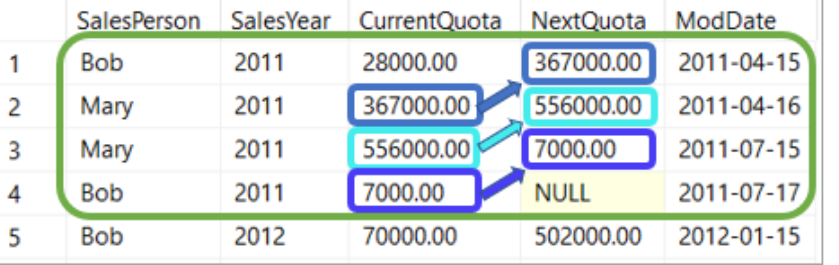
# **LAG**
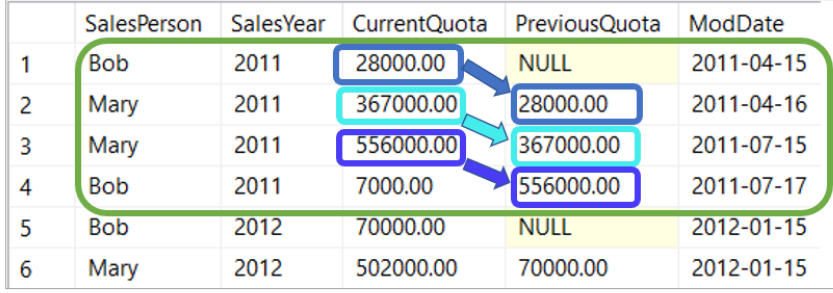

### **First value in a window**

Suppose you want to figure out the first `OrderDate` in each territory or the last one. How would you do that? You can use the window functions `FIRST_VALUE()` and `LAST_VALUE()`, respectively! Here are the steps:

1. First, create partitions for each territory
2. Then, order by `OrderDate`
3. Finally, use the `FIRST_VALUE()` and/or `LAST_VALUE()` functions as per your requirement

* Write a T-SQL query that returns the first `OrderDate` by creating partitions for each `TerritoryName`.

In [8]:
pd.read_sql_query(''' 
SELECT TerritoryName, OrderDate, 
       FIRST_VALUE(OrderDate) OVER(PARTITION BY TerritoryName ORDER BY OrderDate) AS FirstOrder
FROM Orders''', engine)

,territoryName,OrderDate,FirstOrder
0,Australia,2015-02-23T09:00:00Z,2015-02-23T09:00:00Z
1,Australia,2015-02-23T11:00:00Z,2015-02-23T09:00:00Z
2,Australia,2015-02-23T12:00:00Z,2015-02-23T09:00:00Z
3,Australia,2015-04-23T02:00:00Z,2015-02-23T09:00:00Z
4,Australia,2015-04-24T02:00:00Z,2015-02-23T09:00:00Z
...,...,...,...
194,United Kingdom,2015-02-23T07:00:00Z,2015-02-19T02:00:00Z
195,United Kingdom,2015-04-23T12:00:00Z,2015-02-19T02:00:00Z
196,United Kingdom,2015-05-07T06:00:00Z,2015-02-19T02:00:00Z
197,United Kingdom,2015-06-03T08:00:00Z,2015-02-19T02:00:00Z


### **Previous and next values**

What if you want to shift the values in a column by one row up or down? You can use the exact same steps as in the previous exercise but with two new functions, `LEAD()`, for the next value, and `LAG()`, for the previous value. So you follow these steps:

1. First, create partitions
2. Then, order by a certain column
3. Finally, use the `LEAD()` and/or `LAG()` functions as per your requirement

* Write a T-SQL query that for each territory:
    * Shifts the values in `OrderDate` one row down. Call this column `PreviousOrder`.
    * Shifts the values in `OrderDate` one row up. Call this column `NextOrder`. You will need to `PARTITION BY` the territory

In [9]:
pd.read_sql_query('''
SELECT TerritoryName, OrderDate, 
       -- Specify the previous OrderDate in the window
       LAG(OrderDate) 
       -- Over the window, partition by territory & order by order date
       OVER(PARTITION BY TerritoryName ORDER BY OrderDate) AS PreviousOrder,
       -- Specify the next OrderDate in the window
       LEAD(OrderDate) 
       -- Create the partitions and arrange the rows
       OVER(PARTITION BY TerritoryName ORDER BY OrderDate) AS NextOrder
FROM Orders''', engine)

,territoryName,OrderDate,PreviousOrder,NextOrder
0,Australia,2015-02-23T09:00:00Z,None,2015-02-23T11:00:00Z
1,Australia,2015-02-23T11:00:00Z,2015-02-23T09:00:00Z,2015-02-23T12:00:00Z
2,Australia,2015-02-23T12:00:00Z,2015-02-23T11:00:00Z,2015-04-23T02:00:00Z
3,Australia,2015-04-23T02:00:00Z,2015-02-23T12:00:00Z,2015-04-24T02:00:00Z
4,Australia,2015-04-24T02:00:00Z,2015-04-23T02:00:00Z,2015-05-06T03:00:00Z
...,...,...,...,...
194,United Kingdom,2015-02-23T07:00:00Z,2015-02-19T02:00:00Z,2015-04-23T12:00:00Z
195,United Kingdom,2015-04-23T12:00:00Z,2015-02-23T07:00:00Z,2015-05-07T06:00:00Z
196,United Kingdom,2015-05-07T06:00:00Z,2015-04-23T12:00:00Z,2015-06-03T08:00:00Z
197,United Kingdom,2015-06-03T08:00:00Z,2015-05-07T06:00:00Z,2015-07-21T02:00:00Z


### Creating running totals

You usually don't have to use `ORDER BY` when using aggregations, but if you want to create running totals, you should arrange your rows! In this exercise, you will create a running total of `OrderPrice`.

* Create the window, partition by `TerritoryName` and order by `OrderDate` to calculate a running total of OrderPrice

In [21]:
pd.read_sql_query('''
SELECT TerritoryName, STRFTIME('Date: %Y-%m-%d: Time: %H:%M:%S', OrderDate) AS OrderDate, 
       -- Create a running total
       SUM(OrderPrice) 
       -- Create the partitions and arrange the rows
       OVER(PARTITION BY TerritoryName ORDER BY OrderDate) AS TerritoryTotal	  
FROM Orders''', engine)

,territoryName,OrderDate,TerritoryTotal
0,Australia,Date: 2015-02-23: Time: 09:00:00,48.0
1,Australia,Date: 2015-02-23: Time: 11:00:00,83.0
2,Australia,Date: 2015-02-23: Time: 12:00:00,313.0
3,Australia,Date: 2015-04-23: Time: 02:00:00,543.0
4,Australia,Date: 2015-04-24: Time: 02:00:00,568.0
...,...,...,...
194,United Kingdom,Date: 2015-02-23: Time: 07:00:00,377.0
195,United Kingdom,Date: 2015-04-23: Time: 12:00:00,464.0
196,United Kingdom,Date: 2015-05-07: Time: 06:00:00,563.0
197,United Kingdom,Date: 2015-06-03: Time: 08:00:00,595.0


### **Assigning row numbers**

Records in T-SQL are inherently unordered. Although in certain situations, you may want to assign row numbers for reference. In this exercise, you will do just that.

* Write a T-SQL query that assigns row numbers to all records partitioned by `TerritoryName` and ordered by `OrderDate`.

In [22]:
pd.read_sql_query('''
SELECT TerritoryName, OrderDate, 
       ROW_NUMBER() OVER(PARTITION BY TerritoryName ORDER BY OrderDate) AS OrderCount
FROM Orders''', engine)

,territoryName,OrderDate,OrderCount
0,Australia,2015-02-23T09:00:00Z,1
1,Australia,2015-02-23T11:00:00Z,2
2,Australia,2015-02-23T12:00:00Z,3
3,Australia,2015-04-23T02:00:00Z,4
4,Australia,2015-04-24T02:00:00Z,5
...,...,...,...
194,United Kingdom,2015-02-23T07:00:00Z,2
195,United Kingdom,2015-04-23T12:00:00Z,3
196,United Kingdom,2015-05-07T06:00:00Z,4
197,United Kingdom,2015-06-03T08:00:00Z,5


### Calculating standard deviation

Calculating the standard deviation is quite common when dealing with numeric columns. In this exercise, you will calculate the *running standard deviation*, similar to the running total you calculated in the previous lesson.

* Create the window, partition by `TerritoryName` and order by `OrderDate` to calculate a running standard deviation of `OrderPrice`.

#### SQLite doesn't have STDEV

```
SELECT OrderDate, TerritoryName, 
       STDEV(OrderPrice) 
       OVER(PARTITION BY TerritoryName ORDER BY OrderDate) AS StdDevPrice	  
FROM Orders
```

### Calculating mode (I)
Unfortunately, there is no function to calculate the mode, the most recurring value in a column. To calculate the mode:

1. First, create a CTE containing an ordered count of values using `ROW_NUMBER()`
2. Write a query using the CTE to pick the value with the highest row number
In this exercise, you will write the CTE needed to calculate the mode of OrderPrice.

* Create a CTE `ModePrice` that returns two columns (`OrderPrice` and `UnitPriceFrequency`).
* Write a query that returns all rows in this CTE.

In [25]:
pd.read_sql_query('''
WITH ModePrice AS
(
	SELECT OrderPrice, 
	ROW_NUMBER() 
	OVER(PARTITION BY OrderPrice ORDER BY OrderPrice) AS UnitPriceFrequency
	FROM Orders 
)

-- Select everything from the CTE
SELECT * FROM ModePrice''', engine)

,OrderPrice,UnitPriceFrequency
0,3.5,1
1,3.5,2
2,3.7,1
3,3.7,2
4,4.1,1
...,...,...
194,285.0,2
195,285.0,3
196,345.0,1
197,345.0,2


### Calculating mode (II)
In the last exercise, you created a CTE which assigned row numbers to each unique value in `OrderPrice`. All you need to do now is to find the `OrderPrice` with the highest row number.

* Use the CTE `ModePrice` to return the value of `OrderPrice` with the highest row number.

In [26]:
pd.read_sql_query('''
WITH ModePrice AS (SELECT OrderPrice,
                   ROW_NUMBER() OVER (PARTITION BY OrderPrice ORDER BY OrderPrice) AS UnitPriceFrequency
                   FROM Orders)

SELECT OrderPrice AS ModeOrderPrice
FROM ModePrice
WHERE UnitPriceFrequency IN (SELECT MAX(UnitPriceFrequency) FROM ModePrice)''', engine)

,ModeOrderPrice
0,32.0
